# **FINAL PROJECT : Machine Learning Of Car Insurance Claim**

## **ML Preperation**

- Import Package
- Dataset (Import, Describe, Info)
- Pre-Cleansing (Re-Formating & Cleansing Preperation)
- Split Feature Category & Numeric

### **Import Package**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

### **Dataset** (Import, Describe, & Info)

In [ ]:
data = pd.read_csv('file(3).csv')
data.sample(5)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
1011,351272937,0,24.0,4,NaN,$0,Yes,$0,z_No,M,z_High School,Student,58,Commercial,"$3,900",14,Minivan,yes,$0,0,No,3,$0,6.0,0
1054,387139563,0,37.0,1,9.0,"$67,175",Yes,$0,z_No,z_F,PhD,Lawyer,40,Private,"$23,340",9,Pickup,no,$0,0,No,5,$0,22.0,0
8656,876968470,0,53.0,0,11.0,"$178,768",No,"$469,094",z_No,M,PhD,NaN,23,Commercial,"$24,680",6,Panel Truck,no,$0,0,No,1,$0,12.0,0
1436,40478781,1,37.0,1,7.0,"$17,589",No,"$132,645",Yes,z_F,<High School,Clerical,51,Private,"$9,370",6,z_SUV,no,$0,0,No,0,$0,1.0,0
482,247833708,0,43.0,3,11.0,"$19,219",Yes,$0,z_No,z_F,<High School,z_Blue Collar,53,Commercial,"$10,470",11,z_SUV,no,$0,0,No,4,$0,1.0,0


In [ ]:
data.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

### **Pre-Cleansing**

#### Re-Format Value (Cleansing)

In [ ]:
data['INCOME'] = data['INCOME'].str.replace('$' , '')
data['INCOME'] = data['INCOME'].str.replace(',' , '')
data['BLUEBOOK'] = data['BLUEBOOK'].str.replace('$' , '')
data['BLUEBOOK'] = data['BLUEBOOK'].str.replace(',' , '')
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace('$' , '')
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace(',' , '')
data['CLM_AMT'] = data['CLM_AMT'].str.replace('$' , '')
data['CLM_AMT'] = data['CLM_AMT'].str.replace(',' , '')
data['HOME_VAL'] = data['HOME_VAL'].str.replace('$' , '')
data['HOME_VAL'] = data['HOME_VAL'].str.replace(',' , '')
data['MSTATUS'] = data['MSTATUS'].str.replace('z_' , '')
data['GENDER'] = data['GENDER'].str.replace('z_' , '')
data['CAR_TYPE'] = data['CAR_TYPE'].str.replace('z_' , '')
data['EDUCATION'] = data['EDUCATION'].str.replace('z_' , '')
data['EDUCATION'] = data['EDUCATION'].str.replace('<' , '')
data['OCCUPATION'] = data['OCCUPATION'].str.replace('z_' , '')

In [ ]:
data.sample(3)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
1179,723410690,0,35.0,0,10.0,57241,No,0,No,M,High School,Clerical,36,Private,11050,4,Minivan,yes,0,0,No,0,0,1.0,0
5476,988703393,0,29.0,3,11.0,28459,No,117349,Yes,M,High School,Clerical,63,Private,6970,10,Minivan,no,0,0,Yes,0,0,9.0,0
3577,108036736,0,52.0,0,12.0,75774,No,258868,Yes,M,PhD,Doctor,34,Private,20900,9,Van,yes,11407,2,No,4,0,22.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [ ]:
data[['INCOME', 'HOME_VAL', 'CLM_AMT','BLUEBOOK', 'OLDCLAIM']] = data[['INCOME', 'HOME_VAL', 'CLM_AMT','BLUEBOOK', 'OLDCLAIM']].apply(pd.to_numeric)
data.info() #Mengubah datatype ke Numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  int64  
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  int64  
 19  CLM_FREQ    10302 non-nul

#### Cleansing Preparation

In [ ]:
data.isna().sum()

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
dtype: int64

Missing Value dari beberapa Feature akan dilakukan :
1. Categorical : 'Occupation' di-replace oleh Modus
2. Numeric : Menggunakan KNN Imputer

In [ ]:
data.duplicated().sum()

1

Ditemukan 1 row duplikat pada dataset.

In [ ]:
data.duplicated(subset='ID').sum()

1549

Ditemukan 1549 value duplikat pada feature `ID`.

### **Feature Category & Numeric**

In [ ]:
nums = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE','CLAIM_FLAG']
cats = ['PARENT1','MSTATUS','GENDER','EDUCATION','OCCUPATION','CAR_USE','CAR_TYPE','RED_CAR','REVOKED']

In [ ]:
data[nums].describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550
std,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


In [ ]:
data[cats].describe()

,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED
count,10302,10302,10302,10302,9637,10302,10302,10302,10302
unique,2,2,2,4,8,2,6,2,2
top,No,Yes,F,High School,Blue Collar,Private,SUV,no,No
freq,8959,6188,5545,4467,2288,6513,2883,7326,9041


## **First EDA** (Sampling by *Slovin*)

- Sampling Method (*Slovin*)
- Dataset Sample (Info & Describe)
- EDA & Data Vizualization

### **Sampling Method (*Slovin*)**

In [ ]:
N = len(data)
e = 0.025
n = round(N/(1+N*(e**2)))
print(n)

1385


### **Dataset Sample (Info & Describe)**

In [ ]:
sample = data.copy()
sample = sample.dropna()
data2 = sample.sample(n, random_state = 123)
data2.sample(3)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
4090,130158352,1,41.0,2,13.0,58963.0,No,214655.0,Yes,M,Masters,Lawyer,25,Private,17310,16,Van,no,6412,1,No,1,0,11.0,0
959,384934557,0,37.0,1,9.0,6478.0,No,114124.0,Yes,F,High School,Student,43,Private,5300,1,SUV,no,0,0,No,0,0,8.0,0
6718,597035878,1,56.0,2,9.0,83464.0,No,316391.0,Yes,F,High School,Manager,37,Private,12740,10,SUV,no,29423,2,Yes,3,0,1.0,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 631 to 3587
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1385 non-null   int64  
 1   KIDSDRIV    1385 non-null   int64  
 2   AGE         1385 non-null   float64
 3   HOMEKIDS    1385 non-null   int64  
 4   YOJ         1385 non-null   float64
 5   INCOME      1385 non-null   float64
 6   PARENT1     1385 non-null   object 
 7   HOME_VAL    1385 non-null   float64
 8   MSTATUS     1385 non-null   object 
 9   GENDER      1385 non-null   object 
 10  EDUCATION   1385 non-null   object 
 11  OCCUPATION  1385 non-null   object 
 12  TRAVTIME    1385 non-null   int64  
 13  CAR_USE     1385 non-null   object 
 14  BLUEBOOK    1385 non-null   int64  
 15  TIF         1385 non-null   int64  
 16  CAR_TYPE    1385 non-null   object 
 17  RED_CAR     1385 non-null   object 
 18  OLDCLAIM    1385 non-null   int64  
 19  CLM_FREQ    1385 non-null

In [ ]:
data2[nums].describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,0.197834,44.634657,0.761733,10.444043,56954.833935,148036.974729,33.592058,15328.057762,5.420939,4159.490253,0.810830,1.675812,1459.724910,7.971841,0.262094
std,0.555967,8.632809,1.121703,4.185365,43847.205517,123536.928030,15.993507,8026.920073,4.103043,9114.497076,1.188954,2.112350,4364.416787,5.488552,0.439932
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,25037.000000,0.000000,23.000000,9100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,50759.000000,155029.000000,33.000000,14350.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,51.000000,2.000000,13.000000,80567.000000,232815.000000,43.000000,20040.000000,8.000000,4596.000000,2.000000,3.000000,867.000000,12.000000,1.000000
max,3.000000,73.000000,5.000000,19.000000,306277.000000,682634.000000,142.000000,46990.000000,22.000000,49131.000000,5.000000,11.000000,60847.000000,26.000000,1.000000


In [ ]:
data[cats].describe()

,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED
count,10302,10302,10302,10302,9637,10302,10302,10302,10302
unique,2,2,2,4,8,2,6,2,2
top,No,Yes,F,High School,Blue Collar,Private,SUV,no,No
freq,8959,6188,5545,4467,2288,6513,2883,7326,9041


## **EDA & Data Vizualization**

#### Descriptive Analysis
Berikut analisis deskriptif sederhana dari dataset :

In [ ]:
data[nums].describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550
std,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


Beberapa hasil pengamatan dari *statistical summary* di atas, diketahui :
* Distribusi nilai di kolom `AGE`, `YOJ`, `TRAVTIME`, dan `CAR_AGE` terlihat normal (*mean* dan *median* cukup dekat, dan nilai Q2 kira-kira tepat di tengah2 Q1 - Q3)
* Feature `KIDSDRIV`, `HOMEKIDS`, `INCOME`, `BLUEBOOK`, `TIF`, `MVR_PTS`, `CLM_AMT` memiliki distribusi nilai *Positively Skwed*.
* Feature `HOME_VAL`, `OLDCLAIM`, dan `CLM_FREQ` memiliki distribusi nilai *Negatively Skwed*.
* Feature target `CLAIM_FLAG` memiliki mean 0.275 artinya kebanyakan klaim menuju 0 (Tidak mengajukan klaim).

In [ ]:
data[cats].describe()

,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED
count,10302,10302,10302,10302,9637,10302,10302,10302,10302
unique,2,2,2,4,8,2,6,2,2
top,No,Yes,F,High School,Blue Collar,Private,SUV,no,No
freq,8959,6188,5545,4467,2288,6513,2883,7326,9041


### Univariate Analysis

**Numerical**

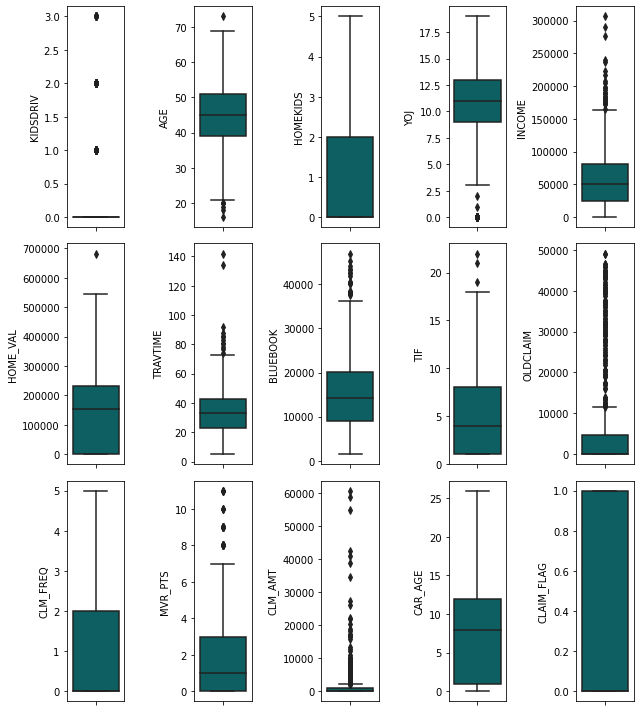

In [ ]:
plt.figure(figsize=(9, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.boxplot(y=data2[nums[i]], color='#006C6F', orient='v')
    plt.tight_layout()

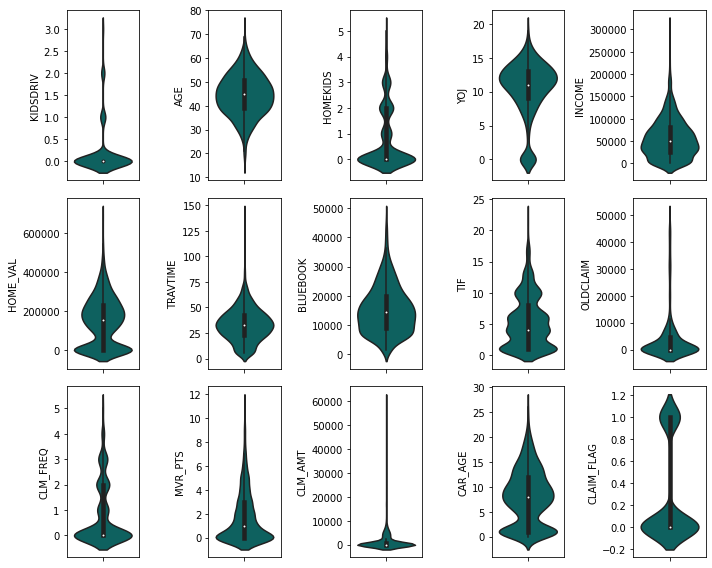

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.violinplot(y=data2[nums[i]], color='#006F6C', orient='v')
    plt.tight_layout()

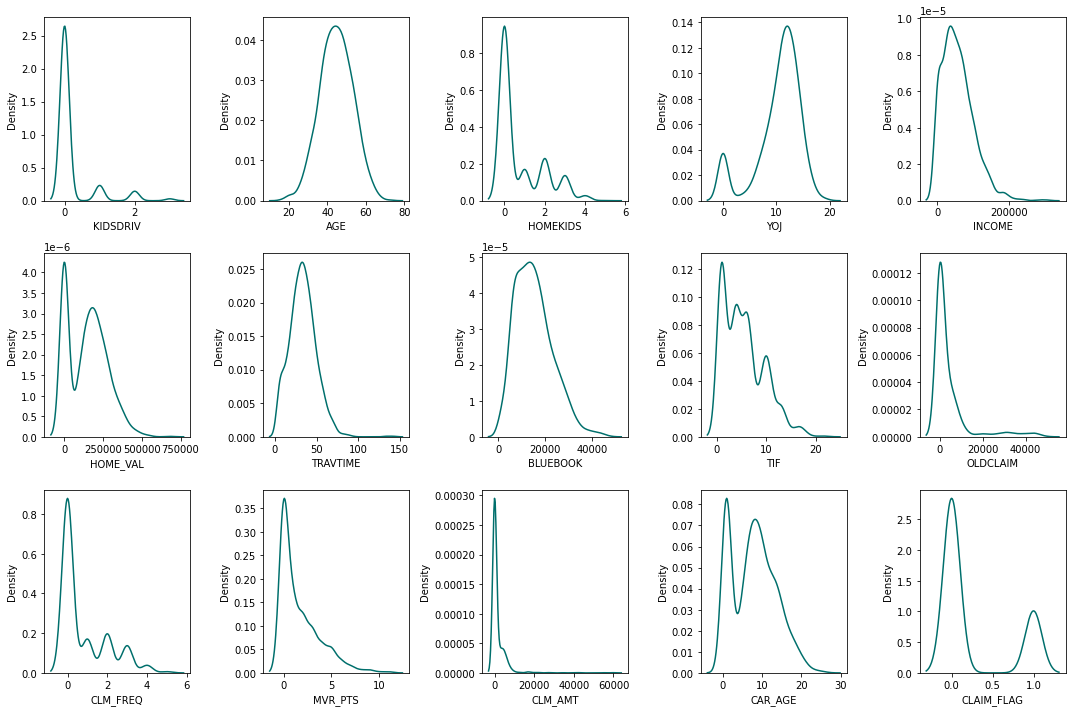

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.kdeplot(data2[nums[i]], color='#006F6C')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Distribusi nilai pada feature `AGE`, `YOJ`, `TRAVTIME`, dan `CAR_AGE` tergolong normal.
* Feature `KIDSDRIV`, `HOMEKIDS`, `INCOME`, `BLUEBOOK`, `TIF`, `MVR_PTS`, `CLM_AMT` memiliki distribusi nilai *Positively Skwed*.
* Feature `HOME_VAL`, `OLDCLAIM`, dan `CLM_FREQ` memiliki distribusi nilai *Negatively Skwed*.
*Feature target `CLAIM_FLAG` memiliki distribusi bimodal.


**Categorical**

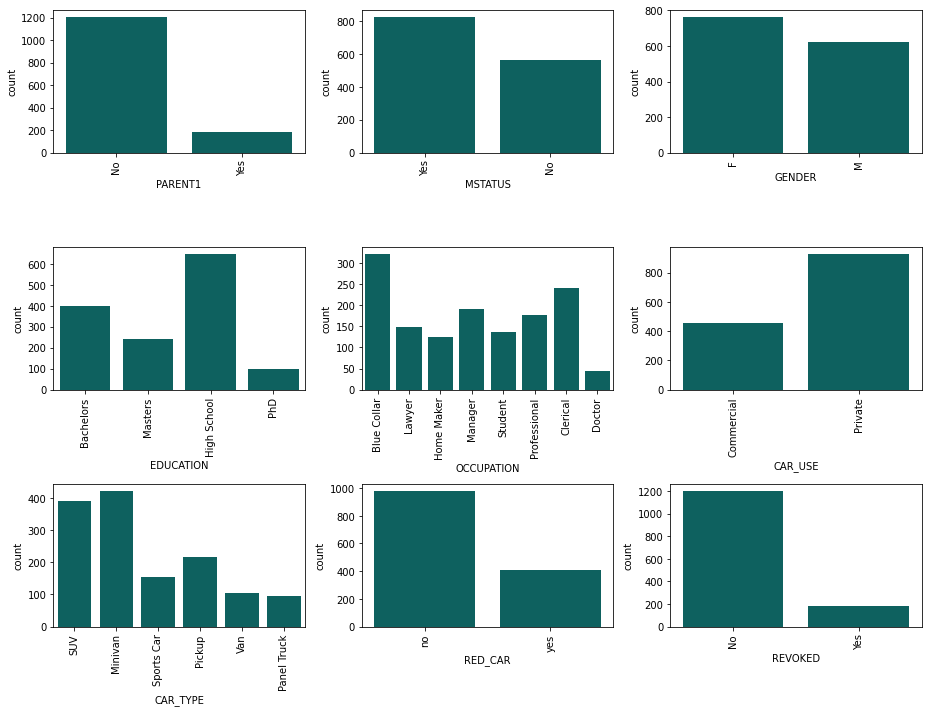

In [ ]:
plt.figure(figsize=(13, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(data2[cats[i]], color='#006F6C', orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

### Multivariate Analysis

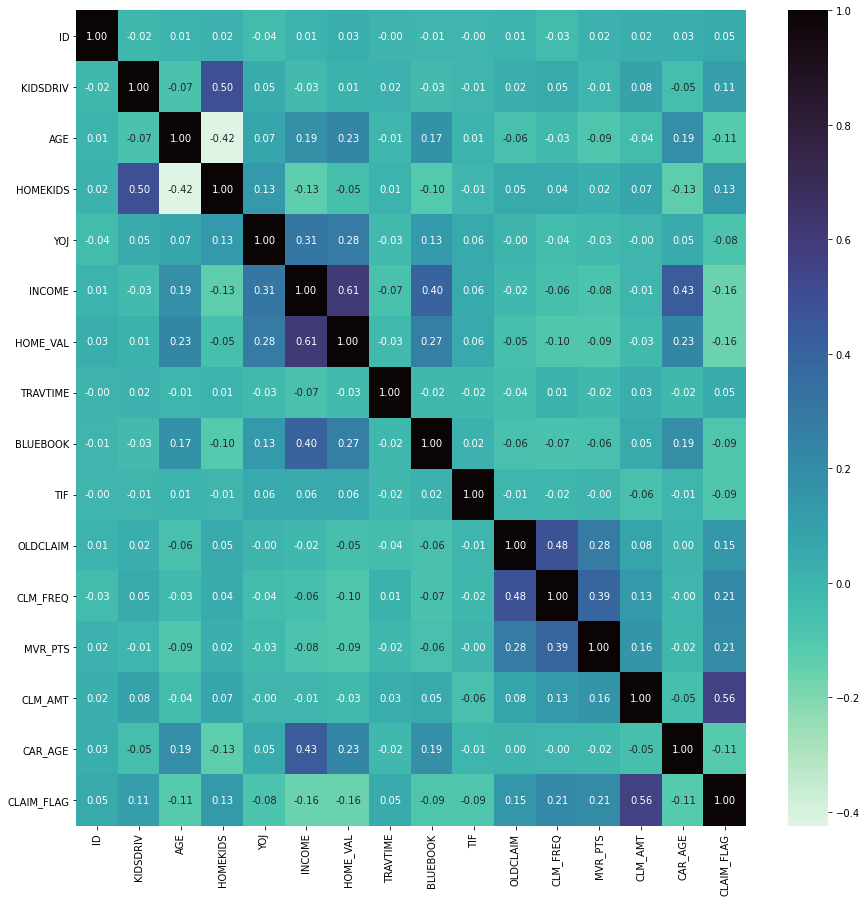

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data2.corr(), cmap='mako_r', annot=True,fmt='.2f');

Dari correlation heatmap di atas dapat dilihat bahwa:

* Feature target yaitu `CLAIM_FLAG`, memiliki korelasi positif yang lemah dengan feature `KIDSDRIV`, `OLDCLAIM`,`CLAIM_FREQ`,`MVR_PTS`. Selain korelasi positif, ada juga korelasi negatif yang lemah antara `CLAIM_FLAG` dengan feature `INCOME` `HOME_VAL`, dan `CAR_AGE`.
* `CLAIM_FLAG` juga memiliki korelasi positif yang kuat dengan `CLM_AMT`.
* Selain itu terdapat beberapa feature `HOME_VAL` dan `INCOME` yang diduga sebagai ***Redundant***.

<Figure size 3600x3600 with 0 Axes>

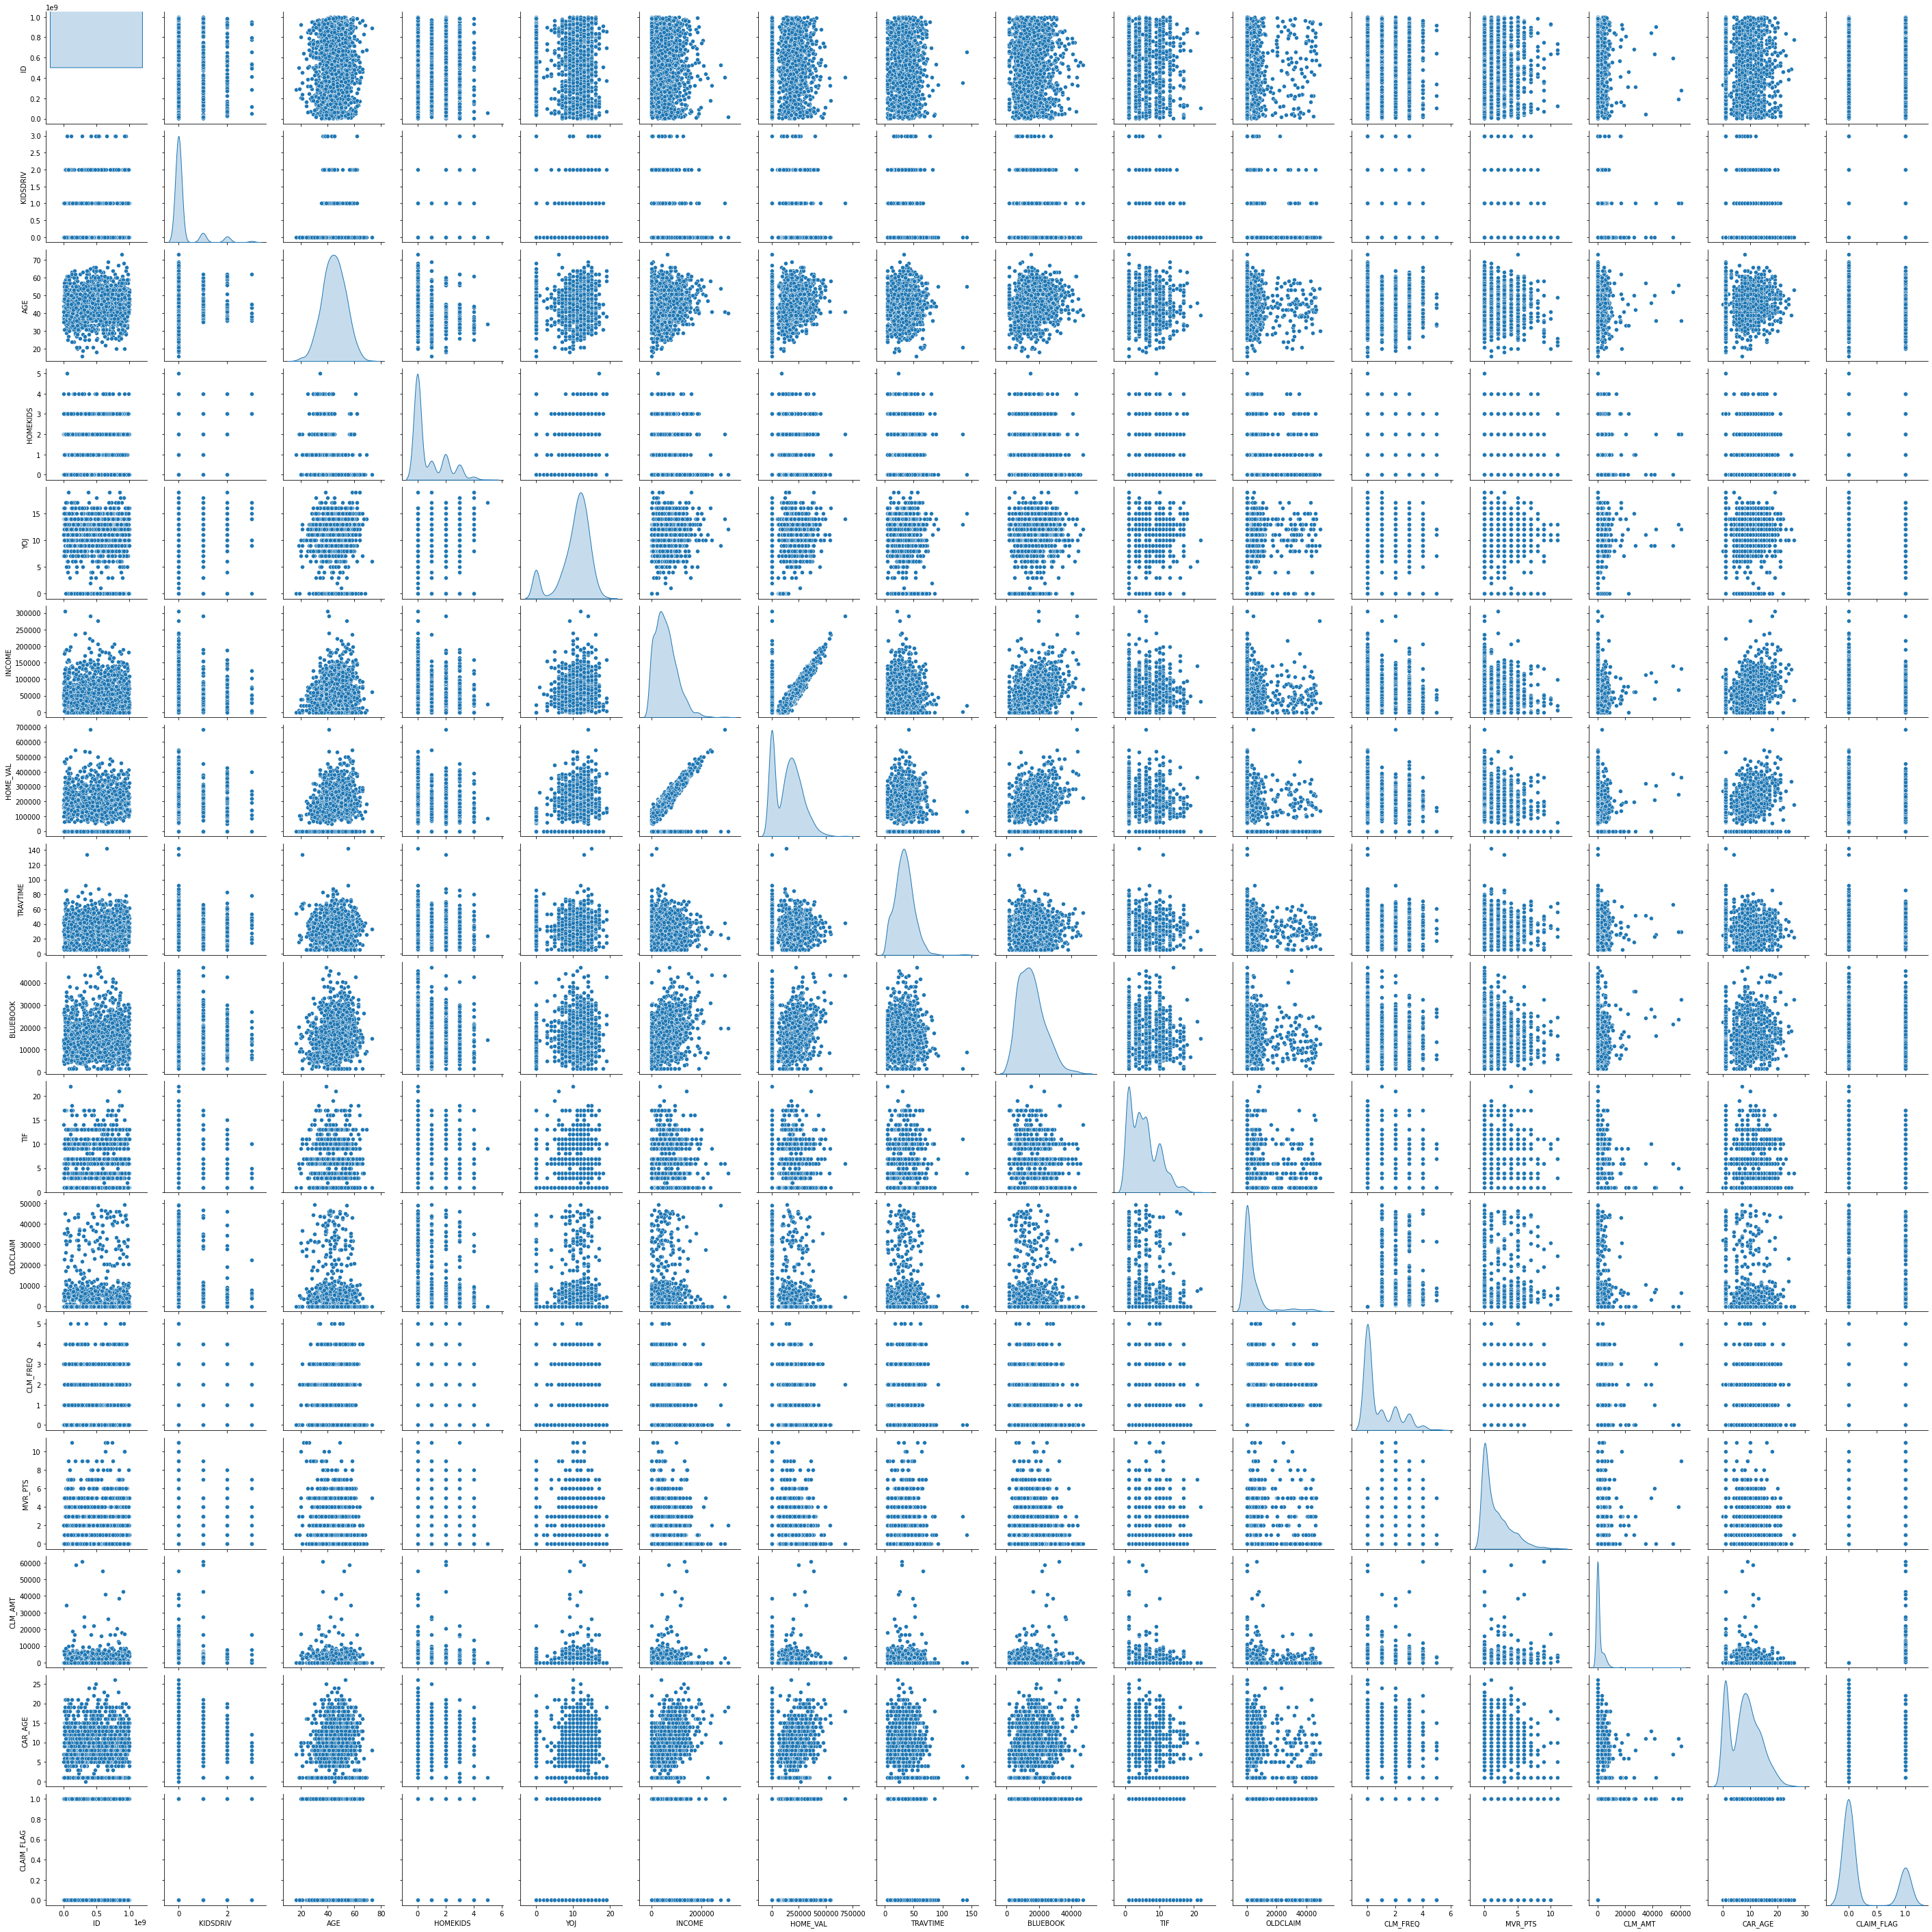

In [ ]:
plt.figure(figsize=(50, 50))
sns.pairplot(data2, diag_kind='kde', palette='mako_r')

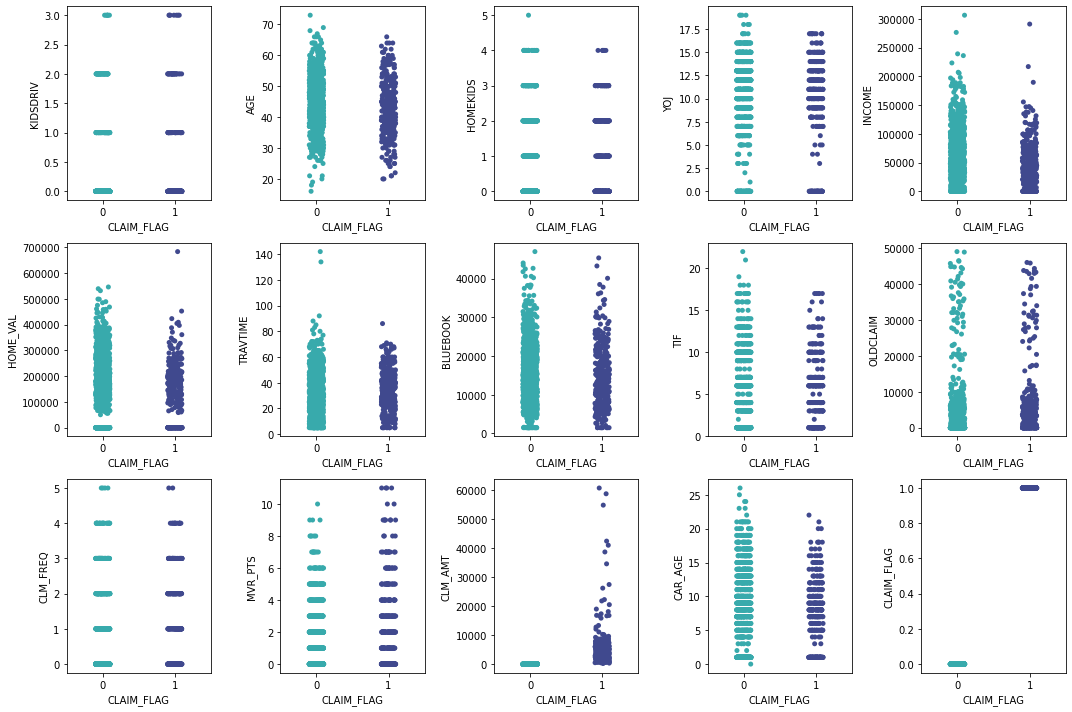

In [ ]:
fig = plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 5, i+1)
    sns.stripplot(ax=ax, data=data2, x='CLAIM_FLAG', y=nums[i], palette='mako_r')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

***EDA Conclusion***
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak terlihat adanya kecacatan.
* Namun masih terdapat value yang kosong/hilang, dan akan dilakukan pengolahan data lebih lanjut di Pre-Processing.
* Beberapa feature memiliki distribusi data yang *skewed*. Mengingat jika menggunakan data sebagai feature untuk model Machine Learning  memerlukan data yang baiknya terdistribusi normal, maka dibutuhkan normalisasi distribusi data yang juga akan diolah lebih lanjut di Pre-Processing.
* `CLM_AMT` memiliki korelasi yang positif dan kuat dengan `CLAIM_FLAG`, maka feature tersebut sangat berguna untuk dijadikan acuan feature lainnya.

###**EDA, Visualization, and Insight**

####Response to User Profile (Gender, Age, Education, Occupation, Years of Join, Marriage Status, and Single Parent)

#####Gender to Feature target and Others

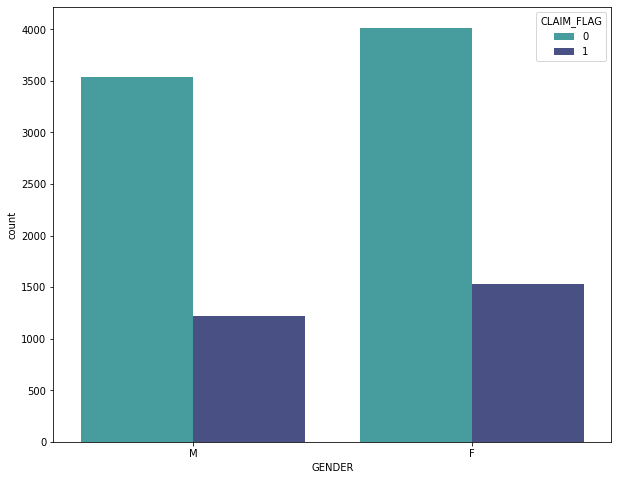

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='GENDER', hue='CLAIM_FLAG', data=data, palette='mako_r');

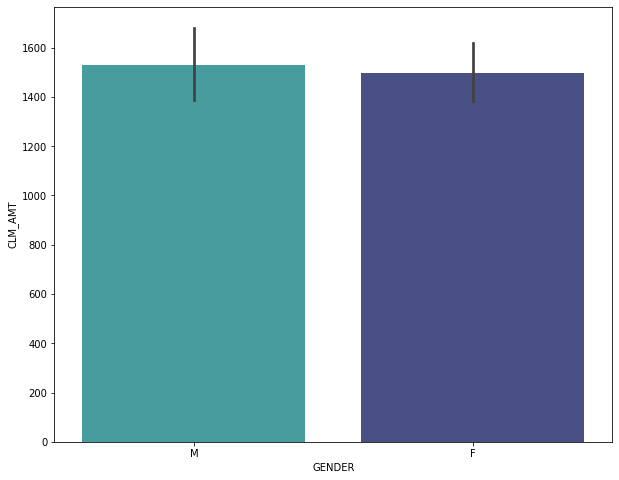

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='CLM_AMT', data=data, palette='mako_r',);

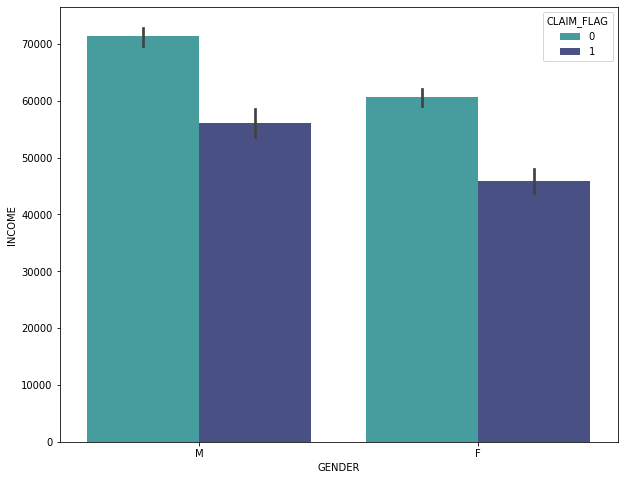

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='INCOME', hue='CLAIM_FLAG', data=data, palette='mako_r',);

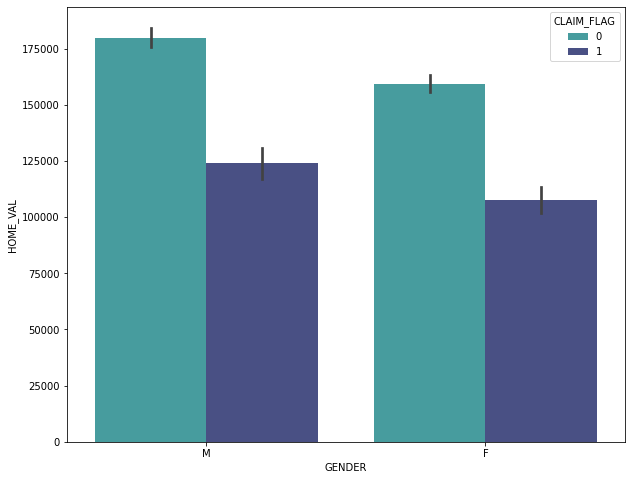

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='HOME_VAL', hue='CLAIM_FLAG', data=data, palette='mako_r',);

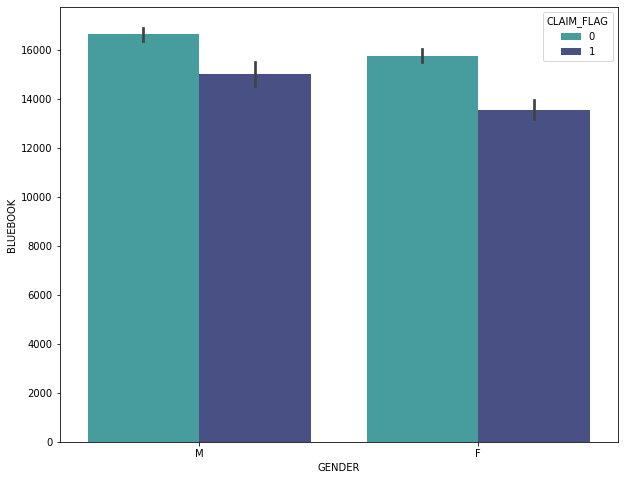

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='BLUEBOOK', hue='CLAIM_FLAG', data=data, palette='mako_r',);

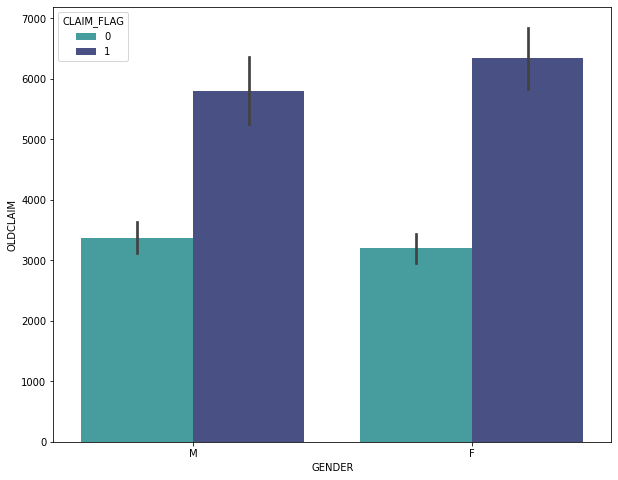

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='OLDCLAIM', hue='CLAIM_FLAG', data=data, palette='mako_r',);

##### Years of Join to Feature target and Others

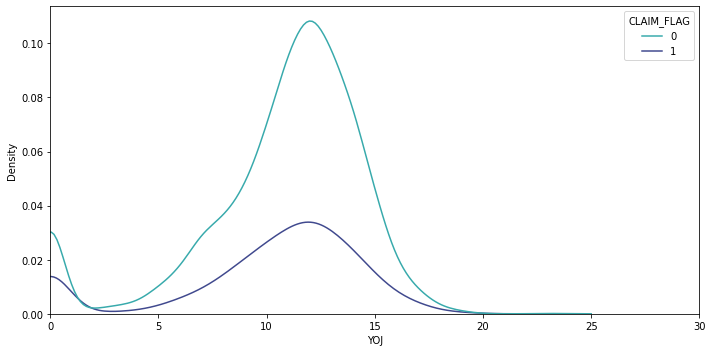

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=data, x="YOJ", hue="CLAIM_FLAG", palette='mako_r')

plt.xlim(0,30)

plt.tight_layout()

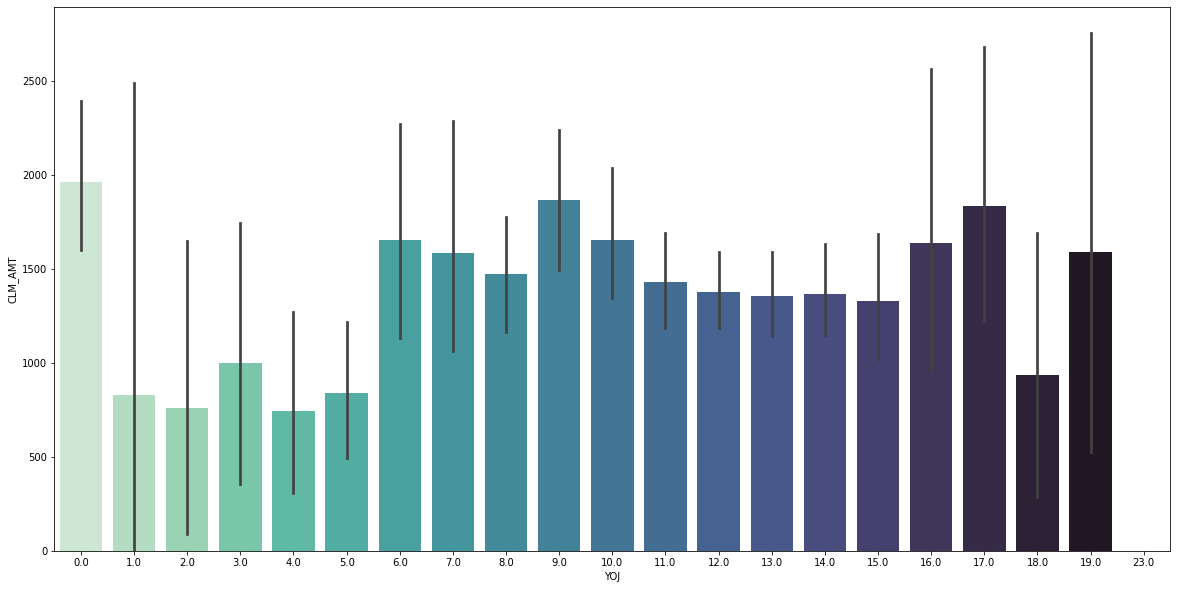

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='CLM_AMT', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='OLDCLAIM', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='INCOME', data=data, palette='mako_r',);

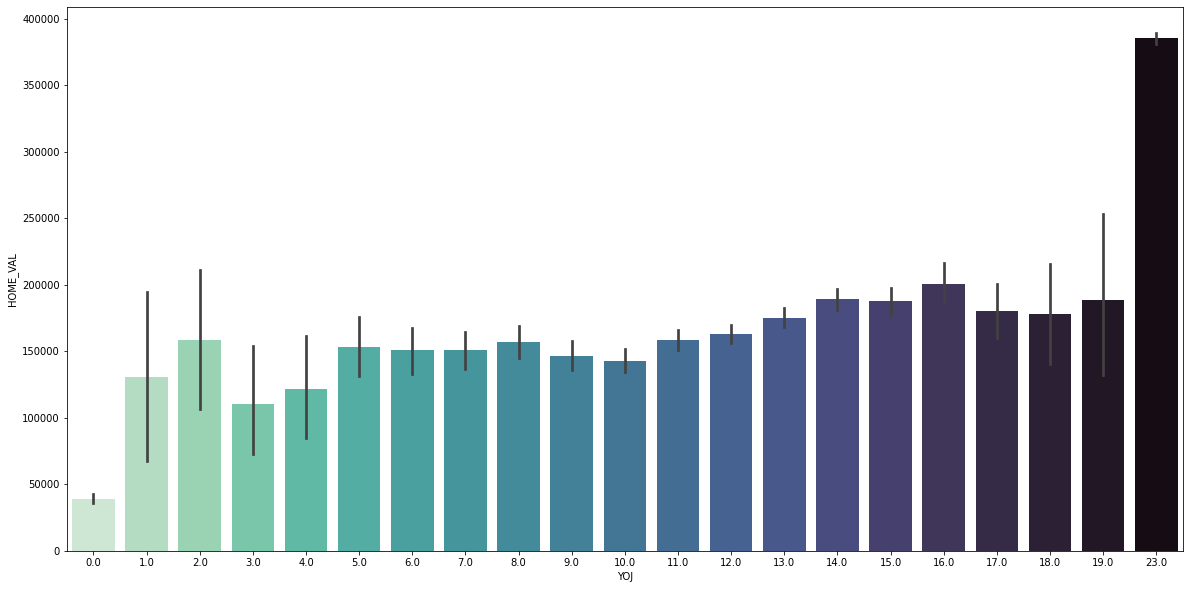

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='HOME_VAL', data=data, palette='mako_r',);

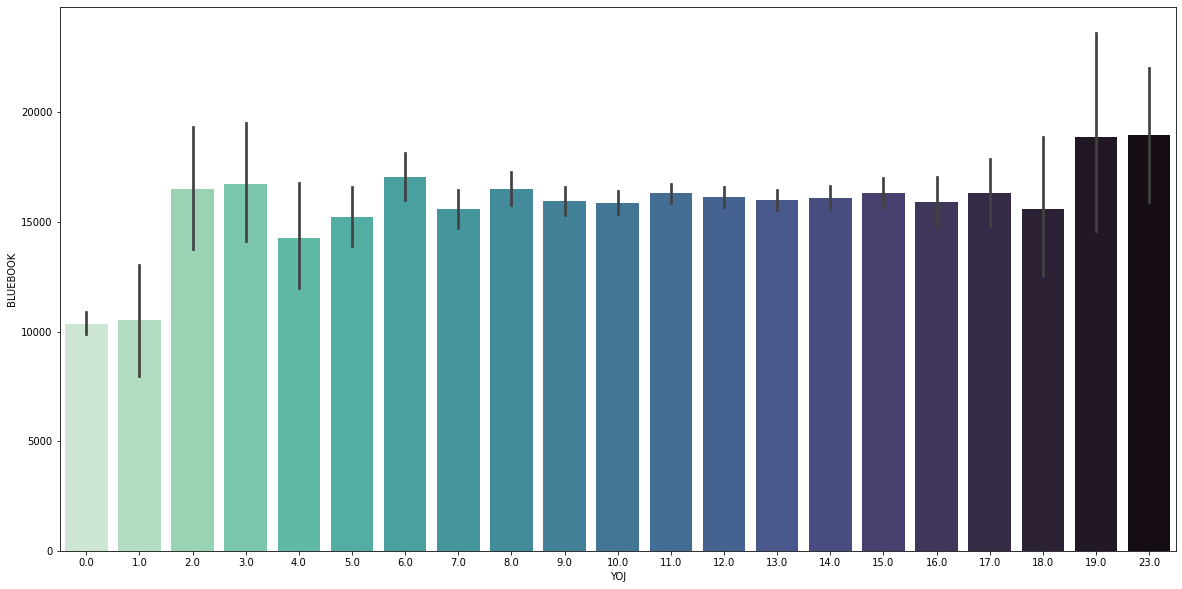

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='BLUEBOOK', data=data, palette='mako_r',);

##### Age to Feature target and Others

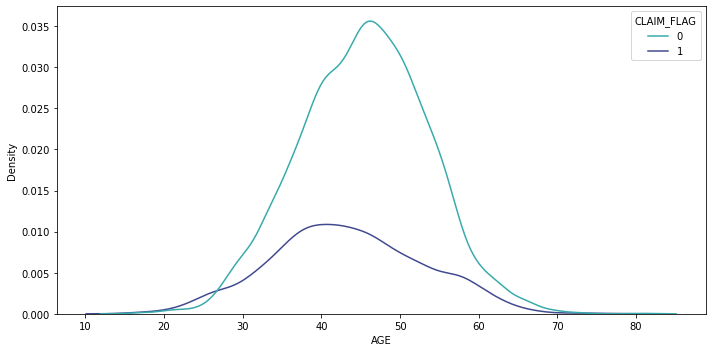

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=data, x="AGE", hue="CLAIM_FLAG", palette='mako_r')

plt.tight_layout()

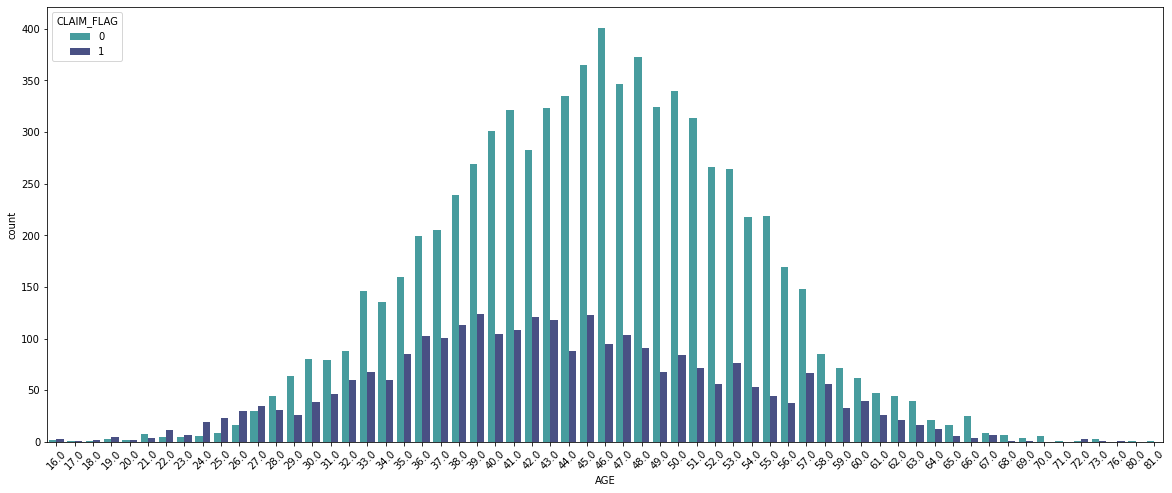

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='AGE', hue='CLAIM_FLAG', data=data, palette='mako_r')
plt.xticks(rotation=45);

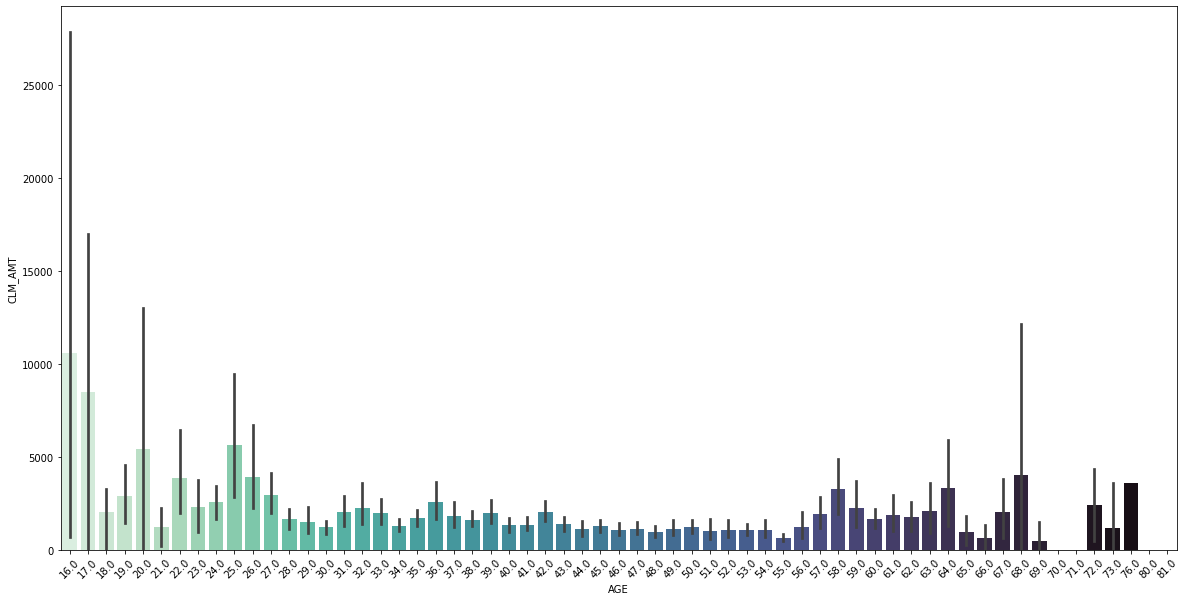

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

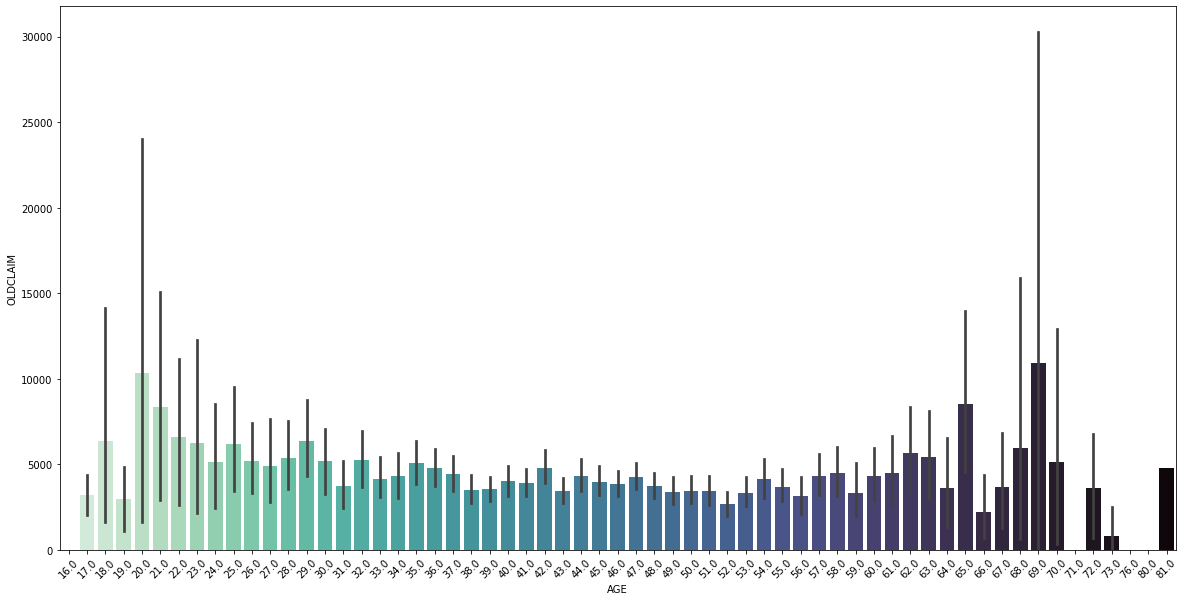

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

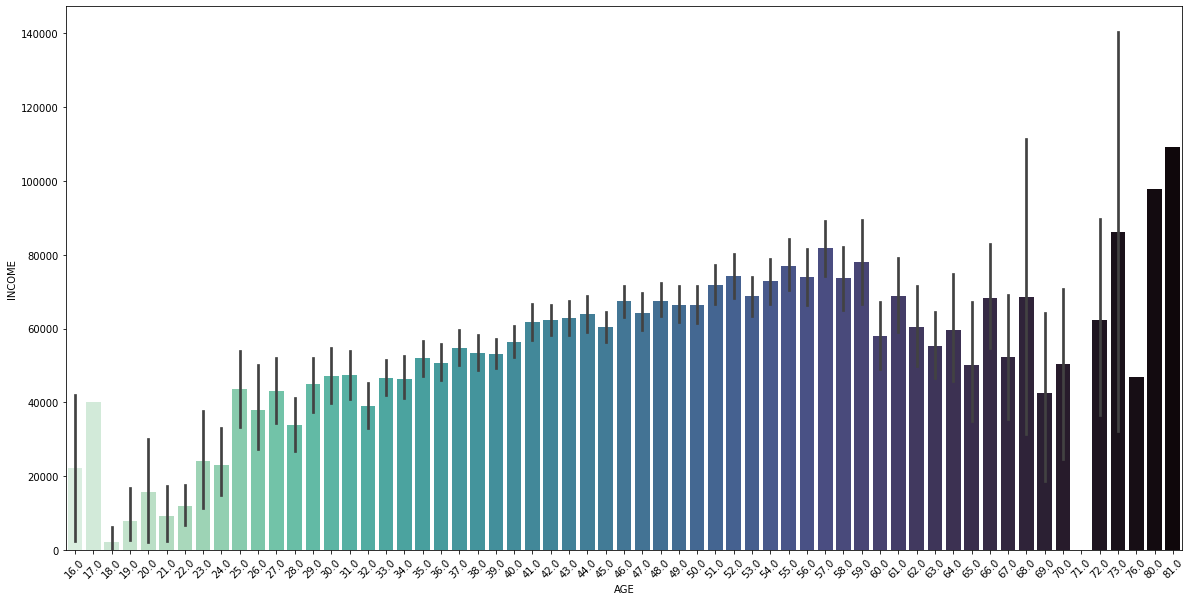

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

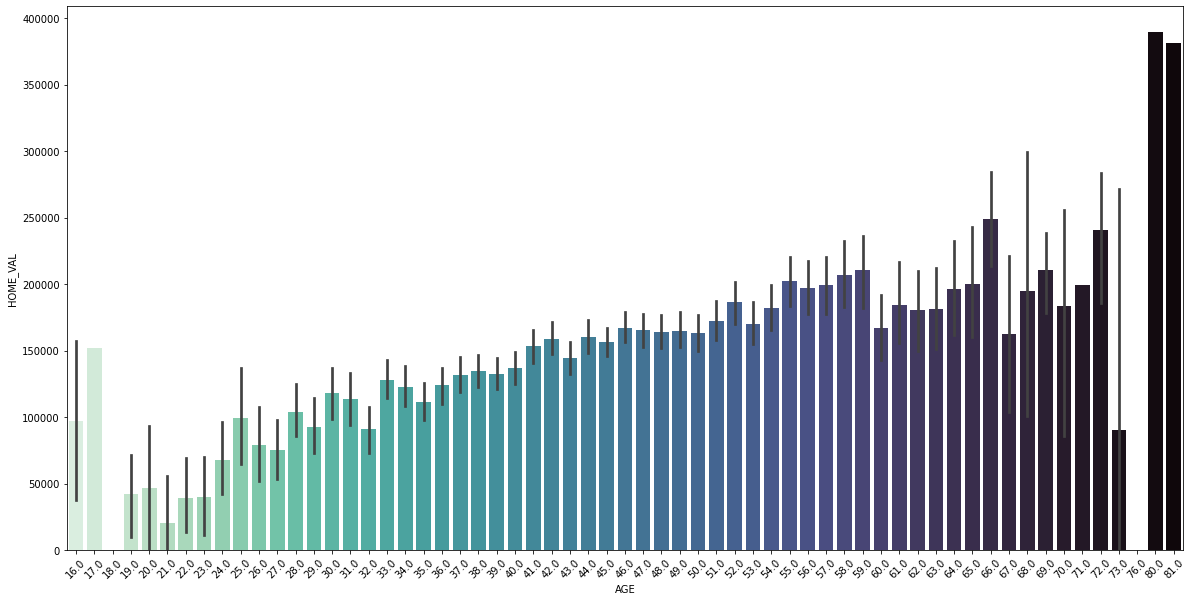

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

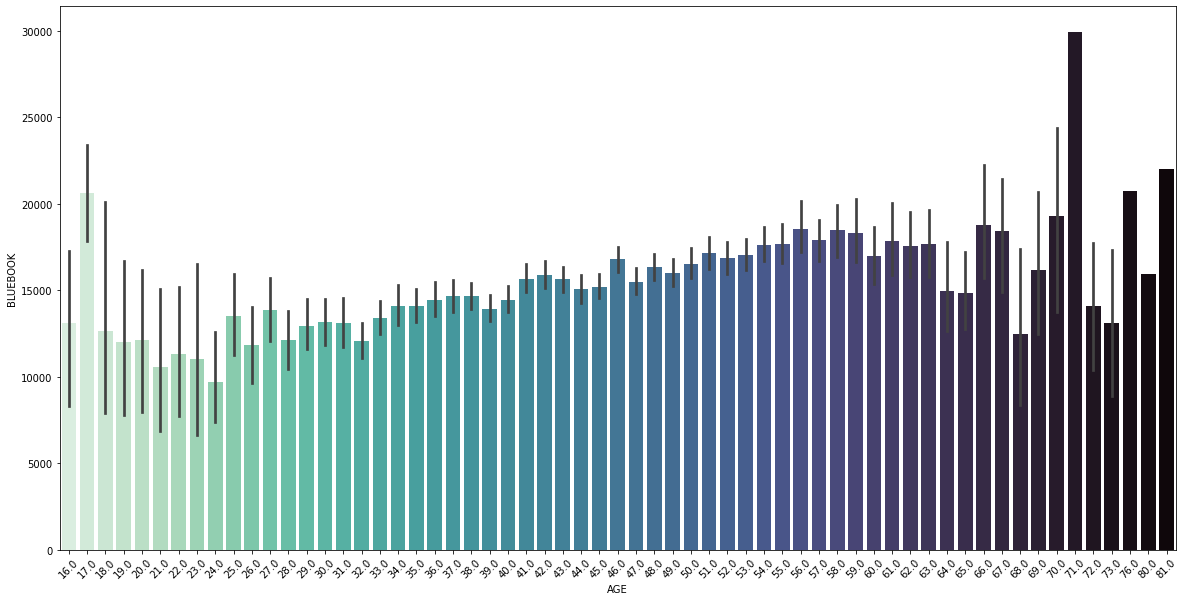

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Education to Feature target and Others

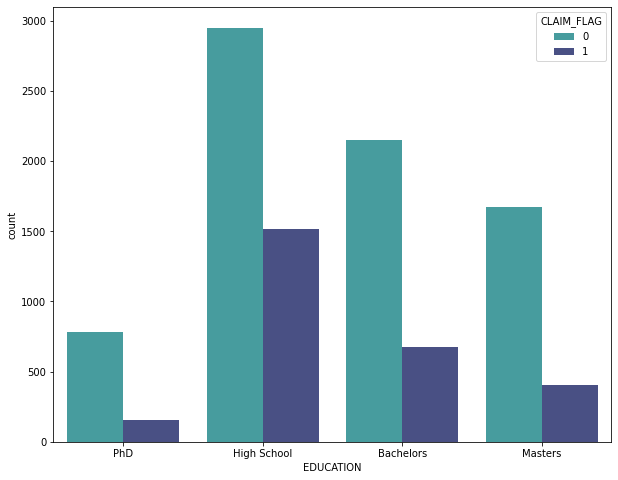

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='EDUCATION', hue='CLAIM_FLAG', data=data, palette='mako_r',);

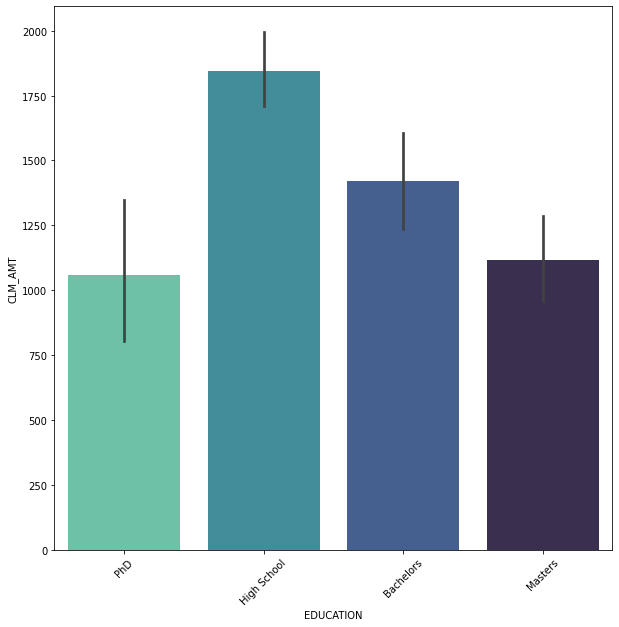

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

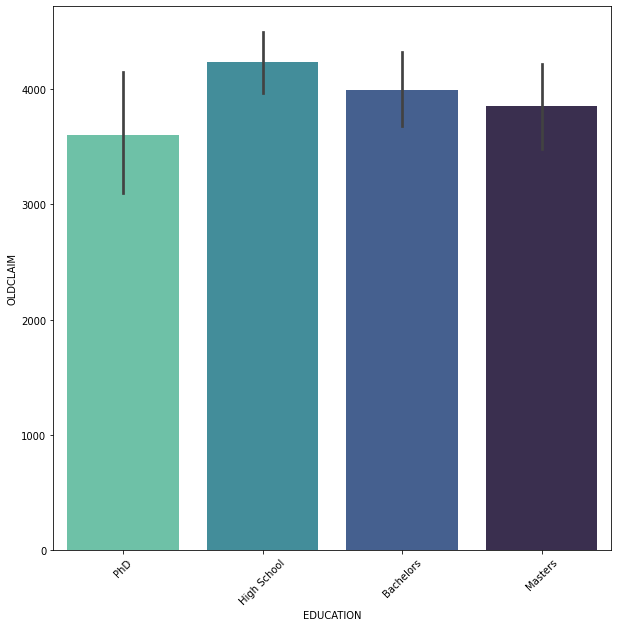

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

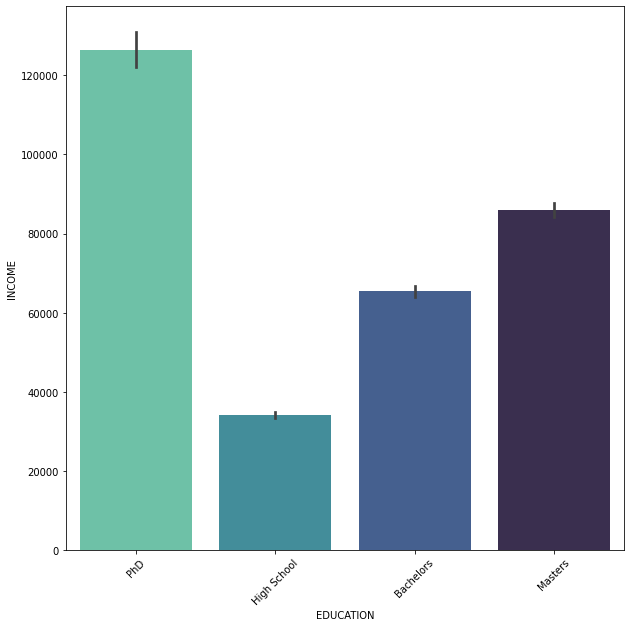

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

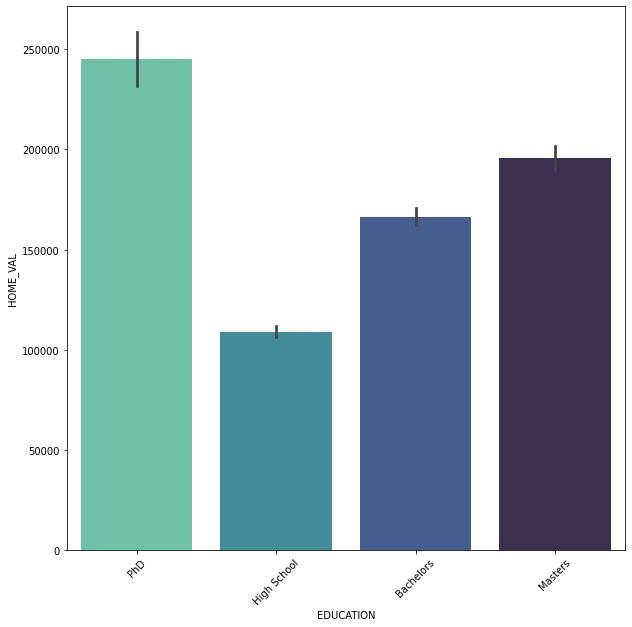

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

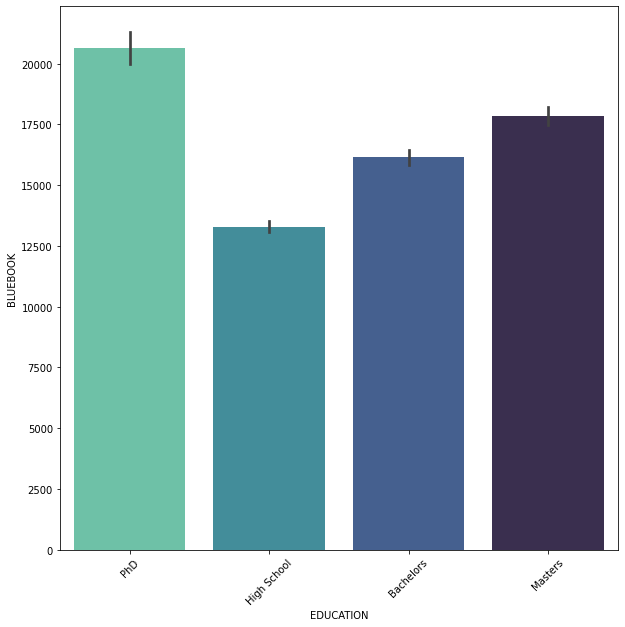

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Occupation to Feature target and Others

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='OCCUPATION', hue='CLAIM_FLAG', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='INCOME', data=data, palette='mako_r')
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Marriage Status to Feature target and Others

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='MSTATUS', hue='CLAIM_FLAG', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Single Parent to Feature target and Others

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='PARENT1', hue='CLAIM_FLAG', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

### Response Claim Frequency to Feature Target

In [ ]:
data_eda = data.copy()

In [ ]:
data_eda['CLM_FREQ'].value_counts()

0    6292
2    1492
1    1279
3     992
4     225
5      22
Name: CLM_FREQ, dtype: int64

In [ ]:
def group_freq(x):
    if x['CLM_FREQ'] == 0:
        frequency = 'low'
    elif x['CLM_FREQ'] == 1:
        frequency = 'low'
    elif x['CLM_FREQ'] == 2:
        frequency = 'medium'
    elif x['CLM_FREQ'] == 3:
        frequency = 'medium'
    elif x['CLM_FREQ'] == 4:
        frequency = 'high'
    else:
        frequency = 'high'
    return frequency

In [ ]:
data_eda['CLAIM_FREQ_GROUP'] = data_eda.apply(lambda x: group_freq(x), axis = 1)

In [ ]:
data_eda['CLAIM_FREQ_GROUP'].value_counts()

low       7571
medium    2484
high       247
Name: CLAIM_FREQ_GROUP, dtype: int64

In [ ]:
clmfreq_distribution = data_eda.groupby(['CLAIM_FREQ_GROUP', 'CLAIM_FLAG']).count()[['ID']]

clmfreq = data_eda.groupby(['CLAIM_FREQ_GROUP']).count()[['ID']]

clmfreq_distribution['percentage'] = clmfreq_distribution.div(clmfreq, level = 'CLAIM_FREQ_GROUP') * 100
clmfreq_distribution = clmfreq_distribution.reset_index()
clmfreq_distribution.columns = ['CLAIM_FREQ_GROUP', 'CLAIM_FLAG', '#of Customers', 'percentage']
clmfreq_distribution

,CLAIM_FREQ_GROUP,CLAIM_FLAG,#of Customers,percentage
0,high,0,147,59.514170
1,high,1,100,40.485830
2,low,0,5944,78.510104
3,low,1,1627,21.489896
4,medium,0,1465,58.977456
5,medium,1,1019,41.022544


In [ ]:
da_mapping = pd.DataFrame({
'CLAIM_FREQ_GROUP': ['low', 'medium', 'high'],
})
sort_mapping = da_mapping.reset_index().set_index('CLAIM_FREQ_GROUP')

In [ ]:
clmfreq_distribution['clmfreq_num'] = clmfreq_distribution['CLAIM_FREQ_GROUP'].map(sort_mapping['index'])

In [ ]:
clmfreq_distribution.sort_values('clmfreq_num')

,CLAIM_FREQ_GROUP,CLAIM_FLAG,#of Customers,percentage,clmfreq_num
2,low,0,5944,78.510104,0
3,low,1,1627,21.489896,0
4,medium,0,1465,58.977456,1
5,medium,1,1019,41.022544,1
0,high,0,147,59.514170,2
1,high,1,100,40.485830,2


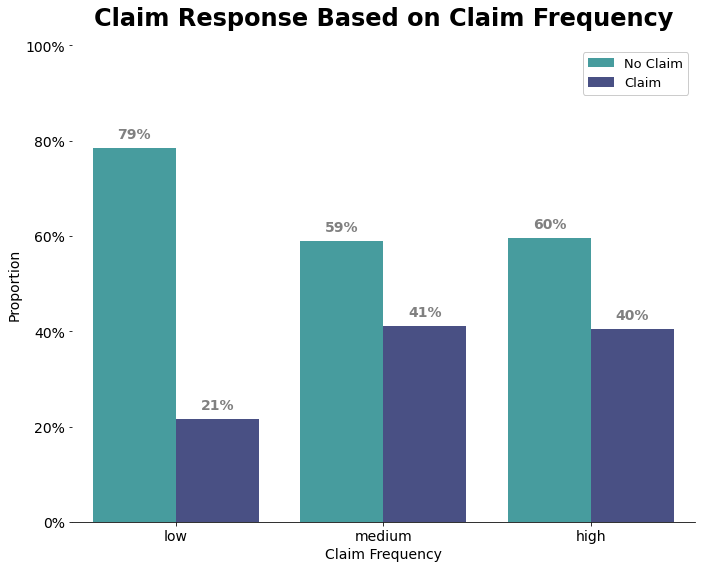

In [ ]:
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'CLAIM_FREQ_GROUP',
    y = 'percentage',
    hue = 'CLAIM_FLAG',
    order = clmfreq_distribution.iloc[clmfreq_distribution[clmfreq_distribution['CLAIM_FLAG'] == 1]['clmfreq_num'].sort_values(ascending = True).index]['CLAIM_FREQ_GROUP'],
    palette = 'mako_r',
    data = clmfreq_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('No Claim')
L.get_texts()[1].set_text('Claim')
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Claim Frequency', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 14,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Claim Response Based on Claim Frequency', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

### Response MVR_PTS to Feature Target

In [ ]:
data_eda['MVR_PTS'].value_counts()

0     4658
1     1467
2     1199
3      966
4      727
5      528
6      341
7      213
8      114
9       53
10      20
11      13
13       2
12       1
Name: MVR_PTS, dtype: int64

In [ ]:
def group_mvrpts(x):
    if x['MVR_PTS'] == 0:
        risk = 'Very Low Risk'
    elif x['MVR_PTS'] == 1:
        risk = 'Low Risk'
    elif x['MVR_PTS'] == 2:
        risk = 'Low Risk'
    elif x['MVR_PTS'] == 3:
        risk = 'Low Risk'
    elif x['MVR_PTS'] == 4:
        risk = 'Minor Risk'
    elif x['MVR_PTS'] == 5:
        risk = 'Minor Risk'
    elif x['MVR_PTS'] == 6:
        risk = 'Borderline Risk'
    elif x['MVR_PTS'] == 7:
        risk = 'Borderline Risk'
    elif x['MVR_PTS'] == 8:
        risk = 'Medium Risk'
    elif x['MVR_PTS'] == 9:
        risk = 'Medium Risk'
    else:
        risk = 'High Risk'
    return risk

In [ ]:
data_eda['MVR_PTS_GROUP'] = data_eda.apply(lambda x: group_mvrpts(x), axis = 1)

In [ ]:
data_eda['MVR_PTS_GROUP'].value_counts()

Very Low Risk      4658
Low Risk           3632
Minor Risk         1255
Borderline Risk     554
Medium Risk         167
High Risk            36
Name: MVR_PTS_GROUP, dtype: int64

In [ ]:
mvrpts_distribution = data_eda.groupby(['MVR_PTS_GROUP', 'CLAIM_FLAG']).count()[['ID']]

mvrpts = data_eda.groupby(['MVR_PTS_GROUP']).count()[['ID']]

mvrpts_distribution['percentage'] = mvrpts_distribution.div(mvrpts, level = 'MVR_PTS_GROUP') * 100
mvrpts_distribution = mvrpts_distribution.reset_index()
mvrpts_distribution.columns = ['MVR_PTS_GROUP', 'CLAIM_FLAG', '#of Customers', 'percentage']
mvrpts_distribution

,MVR_PTS_GROUP,CLAIM_FLAG,#of Customers,percentage
0,Borderline Risk,0,298,53.790614
1,Borderline Risk,1,256,46.209386
2,High Risk,0,6,16.666667
3,High Risk,1,30,83.333333
4,Low Risk,0,2639,72.659692
5,Low Risk,1,993,27.340308
6,Medium Risk,0,58,34.730539
7,Medium Risk,1,109,65.269461
8,Minor Risk,0,793,63.187251
9,Minor Risk,1,462,36.812749


In [ ]:
df_mapping = pd.DataFrame({
'MVR_PTS_GROUP': ['Very Low Risk', 'Low Risk', 'Minor Risk', 'Borderline Risk', 'Medium Risk', 'High Risk'],
})
sort_mapping = df_mapping.reset_index().set_index('MVR_PTS_GROUP')

In [ ]:
mvrpts_distribution['mvrpts_num'] = mvrpts_distribution['MVR_PTS_GROUP'].map(sort_mapping['index'])

In [ ]:
mvrpts_distribution.sort_values('mvrpts_num')

,MVR_PTS_GROUP,CLAIM_FLAG,#of Customers,percentage,mvrpts_num
10,Very Low Risk,0,3762,80.764277,0
11,Very Low Risk,1,896,19.235723,0
4,Low Risk,0,2639,72.659692,1
5,Low Risk,1,993,27.340308,1
8,Minor Risk,0,793,63.187251,2
9,Minor Risk,1,462,36.812749,2
0,Borderline Risk,0,298,53.790614,3
1,Borderline Risk,1,256,46.209386,3
6,Medium Risk,0,58,34.730539,4
7,Medium Risk,1,109,65.269461,4


In [ ]:
plotdata = pd.DataFrame({
    'Very Low Risk':[19, 81],
    'Low Risk':[27, 73],
    'Minor Risk':[37, 63],
    'Borderline Risk': [46, 54],
    'Medium Risk': [65, 35],
    'High Risk': [83, 17]
    }, 
    index=['Claim', 'No Claim']
)
plotdata.head()

,Very Low Risk,Low Risk,Minor Risk,Borderline Risk,Medium Risk,High Risk
Claim,19,27,37,46,65,83
No Claim,81,73,63,54,35,17


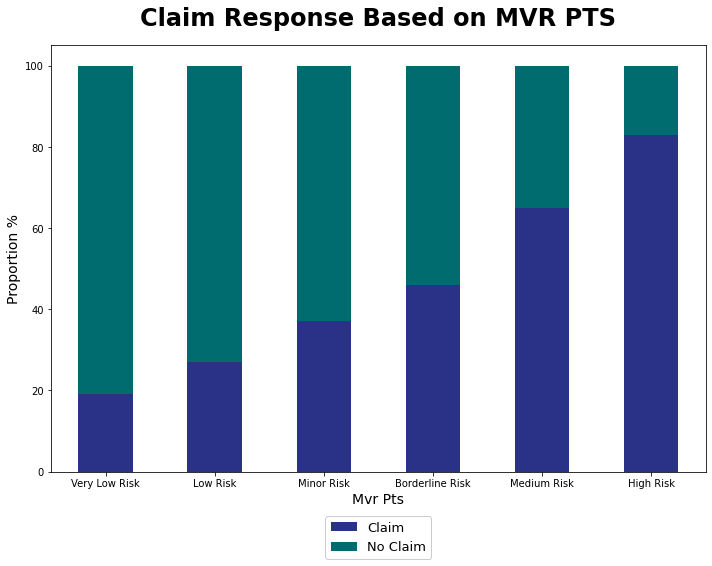

In [ ]:
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True, figsize = (10, 8), color = ['#293286', '#006C6F'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True, loc = 'lower center', bbox_to_anchor=(0.5, -0.22))
L.get_texts()[0].set_text('Claim')
L.get_texts()[1].set_text('No Claim')
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

plt.xticks(rotation = 0)

plt.title('Claim Response Based on MVR PTS', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)
plt.xlabel('Mvr Pts', fontsize = 14)
plt.ylabel('Proportion %', fontsize = 14)


plt.tight_layout()

#### Response to Car Attribute (Car Type, Car Use, Red Car, Car Age )

##### Car Type to Feature target and Others

In [ ]:
car_type = data.groupby(['CAR_TYPE', 'CLAIM_FLAG'])['ID'].count().reset_index()[['CAR_TYPE', 'CLAIM_FLAG', 'ID']]

car_type['total_customer'] = car_type.groupby(['CAR_TYPE'])['ID'].transform('sum')

car_type['percentage'] = car_type['ID']/car_type['total_customer']

car_type['percentage'] = [str(round(x*100))+" %" for x in car_type['percentage']]

car_type

,CAR_TYPE,CLAIM_FLAG,ID,total_customer,percentage
0,Minivan,0,2229,2694,83 %
1,Minivan,1,465,2694,17 %
2,Panel Truck,0,628,853,74 %
3,Panel Truck,1,225,853,26 %
4,Pickup,0,1217,1772,69 %
5,Pickup,1,555,1772,31 %
6,SUV,0,2042,2883,71 %
7,SUV,1,841,2883,29 %
8,Sports Car,0,771,1179,65 %
9,Sports Car,1,408,1179,35 %


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='CAR_TYPE', 
            y='ID', 
            hue='CLAIM_FLAG', 
            data=car_type, 
            palette = 'mako_r', 
            hue_order = [1, 0],
            order = pd.crosstab(data['CAR_TYPE'], data['CLAIM_FLAG']).sort_values(1, ascending = False).index
           )
    
plt.title('Response to Car Type',color='black',fontsize=20)
plt.ylabel('Total Customer', fontsize=13) # y axis label
plt.xlabel('Car Type', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

#SUV
plt.text(-0.30, 410, s='841', fontsize=12, color = 'white', fontweight='bold');
plt.text(-0.30, 880, s='29%', fontsize=12, color = 'black');
plt.text(0.05, 1000, s='2042', fontsize=12, color = 'white', fontweight='bold');
plt.text(0.05, 2080, s='71%', fontsize=12, color = 'black');

#Pickup
plt.text(0.70, 270, s='555', fontsize=12, color = 'white', fontweight='bold');
plt.text(0.70, 590, s='31%', fontsize=12, color = 'black');
plt.text(1.05, 610, s='1217', fontsize=12, color = 'white', fontweight='bold');
plt.text(1.05, 1250, s='69%', fontsize=12, color = 'black');

#Minivan
plt.text(1.70, 230, s='465', fontsize=12, color = 'white', fontweight='bold');
plt.text(1.70, 490, s='17%', fontsize=12, color = 'black');
plt.text(2.05, 1115, s='2229', fontsize=12, color = 'white', fontweight='bold');
plt.text(2.05, 2250, s='83%', fontsize=12, color = 'black');

#Sports Car
plt.text(2.70, 200, s='408', fontsize=12, color = 'white', fontweight='bold');
plt.text(2.70, 448, s='35%', fontsize=12, color = 'black');
plt.text(3.08, 350, s='771', fontsize=12, color = 'white', fontweight='bold');
plt.text(3.08, 800, s='65%', fontsize=12, color = 'black');

#Van
plt.text(3.70, 110, s='252', fontsize=12, color = 'white', fontweight='bold');
plt.text(3.70, 290, s='27%', fontsize=12, color = 'black');
plt.text(4.08, 333, s='669', fontsize=12, color = 'white', fontweight='bold');
plt.text(4.08, 700, s='73%', fontsize=12, color = 'black');

#Panel Truck
plt.text(4.70, 100, s='225', fontsize=12, color = 'white', fontweight='bold');
plt.text(4.70, 265, s='26%', fontsize=12, color = 'black');
plt.text(5.08, 314, s='628', fontsize=12, color = 'white', fontweight='bold');
plt.text(5.08, 668, s='74%', fontsize=12, color = 'black');

plt.tight_layout();

In [ ]:
car_type1 = data.groupby(['CAR_TYPE', 'CLAIM_FLAG'])['CLM_AMT'].sum().reset_index()[['CAR_TYPE', 'CLAIM_FLAG', 'CLM_AMT']]

car_type1 = car_type1[car_type1['CLAIM_FLAG'] == 1]

car_type1

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='CAR_TYPE', 
            y='CLM_AMT', 
            data=car_type1, 
            palette = 'mako_r',
           )


plt.title('Response Car Type to Claim Amount',color='black',fontsize=20)
plt.ylabel('Total Claim', fontsize=13) # y axis label
plt.xlabel('Car Type', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Car Use to Feature target and Others

In [ ]:
car_use = data.groupby(['CAR_USE', 'CLAIM_FLAG'])['ID'].count().reset_index()[['CAR_USE', 'CLAIM_FLAG', 'ID']]

car_use['total_customer'] = car_use.groupby(['CAR_USE'])['ID'].transform('sum')

car_use['percentage'] = car_use['ID']/car_use['total_customer']

car_use['percentage'] = [str(round(x*100))+" %" for x in car_use['percentage']]

car_use

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='CAR_USE', 
            y='ID', 
            hue='CLAIM_FLAG', 
            data=car_use, 
            palette = 'mako_r', 
            hue_order = [1, 0],
            order = pd.crosstab(data['CAR_USE'], data['CLAIM_FLAG']).sort_values(1, ascending = False).index
           )

plt.title('Response to Car Use',color='black',fontsize=20)
plt.ylabel('Total Customer', fontsize=13) # y axis label
plt.xlabel('Car Use', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.ylim(0,6000)

#Private
plt.text(-0.26, 650, s='1436', fontsize=15, color = 'white', fontweight='bold');
plt.text(-0.24, 1486, s='22%', fontsize=15, color = 'black');
plt.text(0.13, 2500, s='5077', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.15, 5127, s='78%', fontsize=15, color = 'black');

#Commercial
plt.text(0.74, 600, s='1310', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.75, 1360, s='35%', fontsize=15, color = 'black');
plt.text(1.14, 1180, s='2479', fontsize=15, color = 'white', fontweight='bold');
plt.text(1.15, 2529, s='65%', fontsize=15, color = 'black');

plt.tight_layout();

In [ ]:
car_use1 = data.groupby(['CAR_USE', 'CLAIM_FLAG'])['CLM_AMT'].sum().reset_index()[['CAR_USE', 'CLAIM_FLAG', 'CLM_AMT']]

car_use1 = car_use1[car_use1['CLAIM_FLAG'] == 1]

car_use1

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='CAR_USE', 
            y='CLM_AMT', 
            data=car_use1, 
            palette = 'mako_r',
           )


plt.title('Response Car Use to Claim Amount',color='black',fontsize=20)
plt.ylabel('Total Claim', fontsize=13) # y axis label
plt.xlabel('Car Use', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Red Car to Feature target and Others

In [ ]:
red_car = data.groupby(['RED_CAR', 'CLAIM_FLAG'])['ID'].count().reset_index()[['RED_CAR', 'CLAIM_FLAG', 'ID']]

red_car['total_customer'] = red_car.groupby(['RED_CAR'])['ID'].transform('sum')

red_car['percentage'] = red_car['ID']/red_car['total_customer']

red_car['percentage'] = [str(round(x*100))+" %" for x in red_car['percentage']]

red_car

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='RED_CAR', 
            y='ID', 
            hue='CLAIM_FLAG', 
            data=red_car, 
            palette = 'mako_r', 
            hue_order = [1, 0],
            order = pd.crosstab(data['RED_CAR'], data['CLAIM_FLAG']).sort_values(1, ascending = False).index
           )

plt.title('Response to Red Car',color='black',fontsize=20)
plt.ylabel('Total Customer', fontsize=13) # y axis label
plt.xlabel('Red Car', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.ylim(0,6000)

#No
plt.text(-0.27, 835, s='1968', fontsize=15, color = 'white', fontweight='bold');
plt.text(-0.26, 2008, s='27%', fontsize=15, color = 'black');
plt.text(0.13, 2750, s='5358', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.15, 5398, s='73%', fontsize=15, color = 'black');

#Yes
plt.text(0.75, 340, s='778', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.75, 820, s='26%', fontsize=15, color = 'black');
plt.text(1.14, 1080, s='2198', fontsize=15, color = 'white', fontweight='bold');
plt.text(1.15, 2230, s='74%', fontsize=15, color = 'black');

plt.tight_layout();

In [ ]:
red_car1 = data.groupby(['RED_CAR', 'CLAIM_FLAG'])['CLM_AMT'].sum().reset_index()[['RED_CAR', 'CLAIM_FLAG', 'CLM_AMT']]

red_car1 = red_car1[red_car1['CLAIM_FLAG'] == 1]

red_car1

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='RED_CAR', 
            y='CLM_AMT', 
            data=red_car1, 
            palette = 'mako_r',
           )


plt.title('Response Red Car to Claim Amount',color='black',fontsize=20)
plt.ylabel('Total Claim', fontsize=13) # y axis label
plt.xlabel('Red Car', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Car Age to Feature Target and Others

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data[data['CLAIM_FLAG'] == 1]['CAR_AGE'].dropna(), color= '#006C6F', label= 'CLAIM_FLAG: 1', ax=ax)
sns.kdeplot(data[data['CLAIM_FLAG'] == 0]['CAR_AGE'].dropna(), color= '#293286', label= 'CLAIM_FLAG: 0', ax=ax)

ax.set_ylabel('Density', fontsize=12) # y axis label
ax.set_xlabel('Car Age', fontsize=12) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(fontsize='medium')
ax.set_xlim(0, 40)

plt.title('Response to Car Age', fontsize=20)

## **Data Pre-Processing**

- Duplicate Data
- Normalization / Standardization
- Feature Encoding
- Missing Data
- Outliers
- Class Imbalance

### Duplicate Data

In [ ]:
print(data.duplicated().sum())
print(data.duplicated(subset='ID').sum())

1
1549


In [ ]:
print(data.duplicated().sum())
data_ad = data.drop_duplicates()
print(data_ad.duplicated().sum())

1
0


###Normalization / Standardization

Untuk kolom-kolom yang cenderung memiliki distribusi normal akan dilakukan standarisasi, sedangkan untuk kolom lainnya akan dilakukan normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data_ad['AGE_std'] = StandardScaler().fit_transform(data_ad['AGE'].values.reshape(len(data_ad), 1))
data_ad['HOMEKIDS_norm'] = MinMaxScaler().fit_transform(data_ad['HOMEKIDS'].values.reshape(len(data_ad), 1))
data_ad['KIDSDRIV_norm'] = MinMaxScaler().fit_transform(data_ad['KIDSDRIV'].values.reshape(len(data_ad), 1))
data_ad['YOJ_std'] = StandardScaler().fit_transform(data_ad['YOJ'].values.reshape(len(data_ad), 1))
data_ad['INCOME_std'] = StandardScaler().fit_transform(data_ad['INCOME'].values.reshape(len(data_ad), 1))
data_ad['HOME_VAL_norm'] = MinMaxScaler().fit_transform(data_ad['HOME_VAL'].values.reshape(len(data_ad), 1))
data_ad['TRAVTIME_std'] = StandardScaler().fit_transform(data_ad['TRAVTIME'].values.reshape(len(data_ad), 1))
data_ad['BLUEBOOK_std'] = StandardScaler().fit_transform(data_ad['BLUEBOOK'].values.reshape(len(data_ad), 1))
data_ad['TIF_norm'] = MinMaxScaler().fit_transform(data_ad['TIF'].values.reshape(len(data_ad), 1))
data_ad['OLDCLAIM_norm'] = MinMaxScaler().fit_transform(data_ad['OLDCLAIM'].values.reshape(len(data_ad), 1))
data_ad['CLM_FREQ_norm'] = MinMaxScaler().fit_transform(data_ad['CLM_FREQ'].values.reshape(len(data_ad), 1))
data_ad['MVR_PTS_norm'] = MinMaxScaler().fit_transform(data_ad['MVR_PTS'].values.reshape(len(data_ad), 1))
data_ad['CLM_AMT_norm'] = MinMaxScaler().fit_transform(data_ad['CLM_AMT'].values.reshape(len(data_ad), 1))
data_ad['CAR_AGE_std'] = StandardScaler().fit_transform(data_ad['CAR_AGE'].values.reshape(len(data_ad), 1))

In [ ]:
norm = ['AGE','HOMEKIDS', 'YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ', 'MVR_PTS', 'CLM_AMT','CAR_AGE', 'KIDSDRIV']
data_ans = data_ad.drop(columns=norm)

In [ ]:
data_ans.describe()

,ID,CLAIM_FLAG,AGE_std,HOMEKIDS_norm,KIDSDRIV_norm,YOJ_std,INCOME_std,HOME_VAL_norm,TRAVTIME_std,BLUEBOOK_std,TIF_norm,OLDCLAIM_norm,CLM_FREQ_norm,MVR_PTS_norm,CLM_AMT_norm,CAR_AGE_std
count,1.030100e+04,10301.000000,1.029400e+04,10301.000000,10301.000000,9.753000e+03,9.731000e+03,9726.000000,1.030100e+04,1.030100e+04,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,9.662000e+03
mean,4.956841e+08,0.266576,2.766390e-16,0.144103,0.042326,-2.507934e-16,-2.618397e-18,0.174536,-1.363610e-16,6.676858e-17,0.180399,0.070732,0.160159,0.131563,0.012263,-1.950374e-16
std,2.864735e+08,0.442190,1.000049e+00,0.223271,0.126633,1.000051e+00,1.000051e+00,0.145933,1.000049e+00,1.000049e+00,0.171282,0.153119,0.230822,0.166081,0.038341,1.000052e+00
min,6.317500e+04,0.000000,-3.350815e+00,0.000000,0.000000,-2.549097e+00,-1.297384e+00,0.000000,-1.790644e+00,-1.679964e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.977418e+00
25%,2.442710e+08,0.000000,-6.783398e-01,0.000000,0.000000,-3.586703e-01,-7.161527e-01,0.000000,-7.194153e-01,-7.664254e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-1.277379e+00
50%,4.970541e+08,0.000000,1.882772e-02,0.000000,0.000000,1.280912e-01,-1.694794e-01,0.181444,-2.626733e-02,-1.494900e-01,0.125000,0.000000,0.000000,0.076923,0.000000,-5.231092e-02
75%,7.395301e+08,1.000000,7.159953e-01,0.200000,0.000000,6.148527e-01,5.177554e-01,0.269125,6.668806e-01,6.204927e-01,0.250000,0.081491,0.400000,0.230769,0.009290,6.477280e-01
max,9.999264e+08,1.000000,4.201833e+00,1.000000,1.000000,3.048660e+00,6.436706e+00,1.000000,6.842199e+00,6.416126e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.447884e+00


### Feature Encoding

In [ ]:
data_ans['OCCUPATION'] = data_ans['OCCUPATION'].fillna('Blue Collar')

In [ ]:
for catt in cats:
    onehots = pd.get_dummies(data_ans[catt], prefix=catt)
    data_ans = data_ans.join(onehots)

In [ ]:
data_afe = data_ans.copy()

In [ ]:
data_afe = data_afe.drop(['PARENT1', 'PARENT1_No','MSTATUS','MSTATUS_No','GENDER',
                  'GENDER_F','RED_CAR','RED_CAR_no','REVOKED','REVOKED_No',
                  'CAR_TYPE', 'CAR_USE_Commercial','CAR_USE','EDUCATION',
                  'OCCUPATION'], axis=1)
data_afe.sample(3)

,ID,CLAIM_FLAG,AGE_std,HOMEKIDS_norm,KIDSDRIV_norm,YOJ_std,INCOME_std,HOME_VAL_norm,TRAVTIME_std,BLUEBOOK_std,TIF_norm,OLDCLAIM_norm,CLM_FREQ_norm,MVR_PTS_norm,CLM_AMT_norm,CAR_AGE_std,PARENT1_Yes,MSTATUS_Yes,GENDER_M,EDUCATION_Bachelors,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,RED_CAR_yes,REVOKED_Yes
4998,228437432,0,-0.329756,0.4,0.5,0.371472,0.997704,0.374961,-1.286536,-1.181670,0.208333,0.488472,0.4,0.384615,0.0,1.872796,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2919,316675115,0,-0.097367,0.0,0.0,0.614853,0.252005,0.271337,0.603867,-0.285928,0.125000,0.000000,0.0,0.000000,0.0,0.472718,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
2872,996829275,0,0.599801,0.0,0.0,0.128091,-0.486909,0.214302,0.225786,1.214886,0.375000,0.000000,0.0,0.000000,0.0,-0.052311,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


### Missing Data

In [ ]:
data_afe.columns[data_afe.isna().any()]

Index(['AGE_std', 'YOJ_std', 'INCOME_std', 'HOME_VAL_norm', 'CAR_AGE_std'], dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_afe = pd.DataFrame(imputer.fit_transform(data_afe),columns = data_afe.columns)

In [ ]:
data_afe.isna().any()

ID                         False
CLAIM_FLAG                 False
AGE_std                    False
HOMEKIDS_norm              False
KIDSDRIV_norm              False
YOJ_std                    False
INCOME_std                 False
HOME_VAL_norm              False
TRAVTIME_std               False
BLUEBOOK_std               False
TIF_norm                   False
OLDCLAIM_norm              False
CLM_FREQ_norm              False
MVR_PTS_norm               False
CLM_AMT_norm               False
CAR_AGE_std                False
PARENT1_Yes                False
MSTATUS_Yes                False
GENDER_M                   False
EDUCATION_Bachelors        False
EDUCATION_High School      False
EDUCATION_Masters          False
EDUCATION_PhD              False
OCCUPATION_Blue Collar     False
OCCUPATION_Clerical        False
OCCUPATION_Doctor          False
OCCUPATION_Home Maker      False
OCCUPATION_Lawyer          False
OCCUPATION_Manager         False
OCCUPATION_Professional    False
OCCUPATION

In [ ]:
data_amd = data_afe.copy()

###Outliers

In [ ]:
nums_new =['KIDSDRIV_norm','HOMEKIDS_norm', 'CLM_FREQ_norm', 'MVR_PTS_norm', 'CLAIM_FLAG' , 'AGE_std' , 
           'YOJ_std','INCOME_std', 'HOME_VAL_norm','TRAVTIME_std','BLUEBOOK_std','TIF_norm',
           'TIF_norm', 'OLDCLAIM_norm', 'CLM_AMT_norm','CAR_AGE_std']

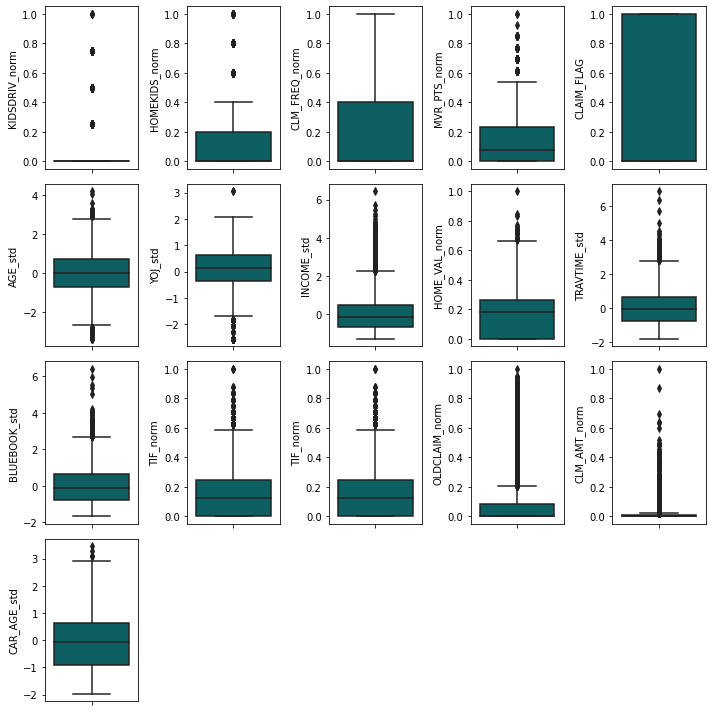

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(nums_new)):
    plt.subplot(4, len(nums_new)/3, i+1)
    sns.boxplot(y=data_amd[nums_new[i]], color='#006C6F', orient='v')
    plt.tight_layout()

In [ ]:
out =['KIDSDRIV_norm','HOMEKIDS_norm', 'CLM_FREQ_norm', 'MVR_PTS_norm', 'AGE_std' , 'YOJ_std','INCOME_std', 'HOME_VAL_norm','TRAVTIME_std','BLUEBOOK_std','TIF_norm','TIF_norm', 'OLDCLAIM_norm', 'CLM_AMT_norm','CAR_AGE_std']

In [ ]:
len(data_amd)

10301

In [ ]:
filtered_entries = np.array([True] * len(data_amd))
for col in nums_new:
  Q1 = data_amd[col].quantile(0.25)
  Q3 = data_amd[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (IQR * 1.5)
  high_limit = Q3 + (IQR * 1.5)

  filtered_entries = ((data_amd[col] >= low_limit) & (data_amd[col] <= high_limit)) & filtered_entries
    
data_amd = data_amd[filtered_entries]

In [ ]:
data_aout = data_amd.copy()
len(data_aout)

5412

### Class Imbalance

In [ ]:
data_aout['CLAIM_FLAG'].value_counts()

0.0    5022
1.0     390
Name: CLAIM_FLAG, dtype: int64

In [ ]:
X = data_aout[[col for col in data_aout.columns if (str(data_aout[col].dtype) != 'object') and col not in ['ID','CLAIM_FLAG']]]
y = data_aout['CLAIM_FLAG'].values

print(X.shape)
print(y.shape)

(5412, 38)
(5412,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
print(pd.Series(y).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_SMOTE).value_counts())

0.0    5022
1.0     390
dtype: int64
0.0    780
1.0    390
dtype: int64
0.0    5022
1.0    2511
dtype: int64
1.0    5022
0.0    5022
dtype: int64
